## 추가제곱합
 * 이 변수를 포함시키지 않고 구한 회귀제곱합에서 이 변수를 포함시키고 구한 회귀제곱합이 추가적으로 어느 정도 커졌는가를 검토
 * 이때 추가적으로 증가된 제곱합을 **추가제곱합**이라고 한다.

In [1]:
health = read.table("reg/health.txt", header=T)
head(health,3)

ID,X1,X2,X3,X4,Y
1,217,67,260,91,481
2,141,52,190,66,292
3,152,58,203,68,338


In [3]:
h1.lm = lm(Y~X1, data=health)
h2.lm = lm(Y~X1+X4, data=health)
anova(h1.lm, h2.lm)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
28,50795.05,NA,NA,NA,NA
27,24049.49,1,26745.56,30.02684,8.418827e-06


## 추가변수그림(편회귀그림)
 * 새로운 변수가 들어옴으로써 추가설명력이 얼마나 유의한가 설명

In [8]:
install.packages('car')
library(car)

Installing package into 'C:/Users/yeoga/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'car' is in use and will not be installed"

In [9]:
h4.lm=lm(Y ~ X1+ X2+X3+X4, data=health)

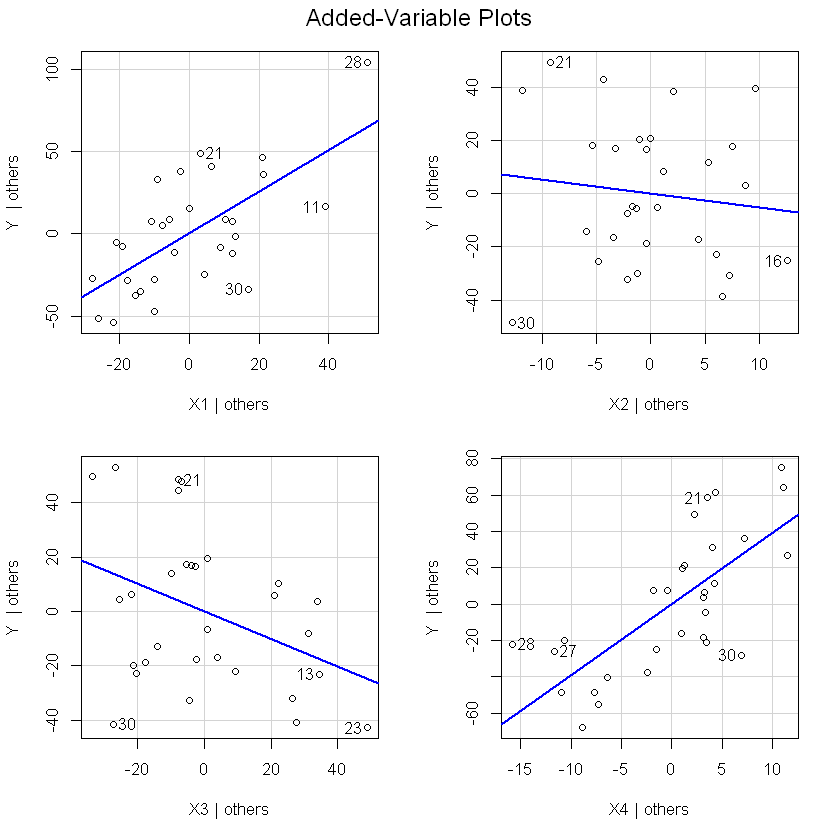

In [10]:
avPlots(h4.lm)

변수 x1과 x4에 대한 추가변수그림이 선형성이 강한 것을 볼 수 있음. 따라서 이 두 변수가 회귀모형에 매우 유의.

## 2.8 분석 사례

In [12]:
install.packages("xlsx")
library(xlsx)

Installing package into 'C:/Users/yeoga/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'xlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yeoga\AppData\Local\Temp\RtmpQhaf1o\downloaded_packages


Warning message:
"package 'xlsx' was built under R version 3.6.3"

In [14]:
chemical = read.xlsx("reg/chemical.xlsx", 1)
head(chemical)
# head : 처음꺼
# tail : 뒤에꺼

id,speed,temp,loss
1,70,20,15
2,80,27,42
3,75,25,37
4,62,24,28
5,65,23,20
6,58,18,14


In [15]:
# 기술통계량 및 상관계수보기
summary(chemical[,-1])
cor(chemical[,-1])

     speed           temp            loss      
 Min.   :50.0   Min.   :17.00   Min.   : 8.00  
 1st Qu.:57.5   1st Qu.:19.50   1st Qu.:13.75  
 Median :61.0   Median :20.50   Median :16.50  
 Mean   :63.0   Mean   :21.50   Mean   :20.25  
 3rd Qu.:70.5   3rd Qu.:24.25   3rd Qu.:24.25  
 Max.   :80.0   Max.   :27.00   Max.   :42.00  

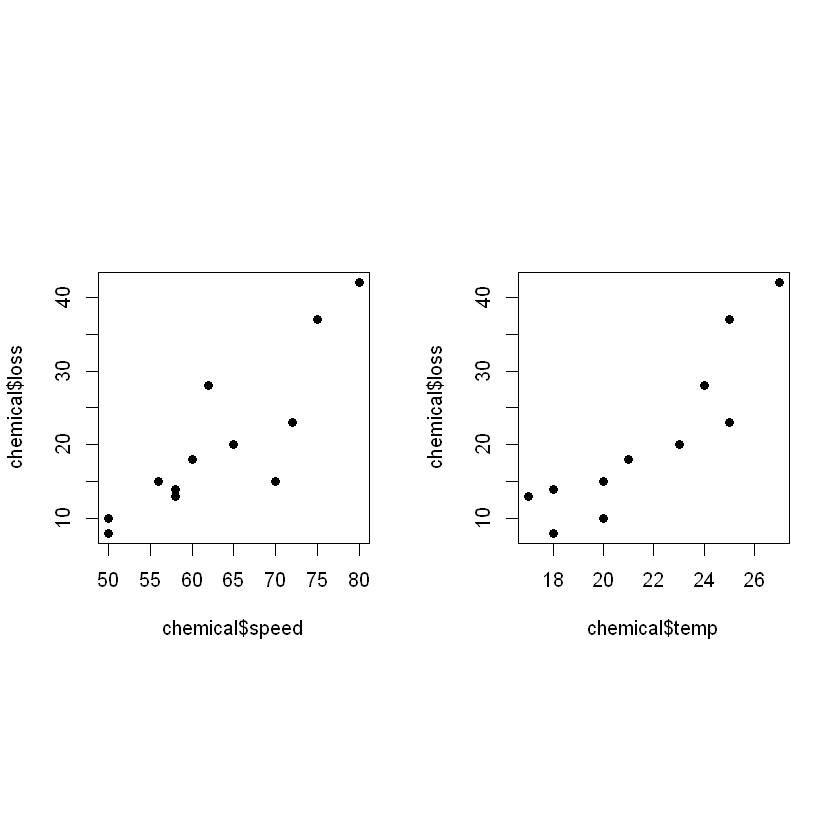

In [18]:
#산점도 그리기
#한행에 두개 출력, 정사각형으로
par(mfrow=c(1,2), pty="s")
plot(chemical$speed, chemical$loss, pch=19)
plot(chemical$temp, chemical$loss, pch=19 )

In [20]:
# 회귀모형 적합하기
chemical.lm = lm(loss ~ speed + temp, data=chemical)
summary(chemical.lm)
# speed Pr이 크다.


Call:
lm(formula = loss ~ speed + temp, data = chemical)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7699 -2.4093  0.2795  3.4019  4.9654 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -47.6243     9.4580  -5.035 0.000704 ***
speed         0.4216     0.2350   1.794 0.106360    
temp          1.9217     0.6977   2.754 0.022316 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.465 on 9 degrees of freedom
Multiple R-squared:  0.8539,	Adjusted R-squared:  0.8214 
F-statistic:  26.3 on 2 and 9 DF,  p-value: 0.0001741


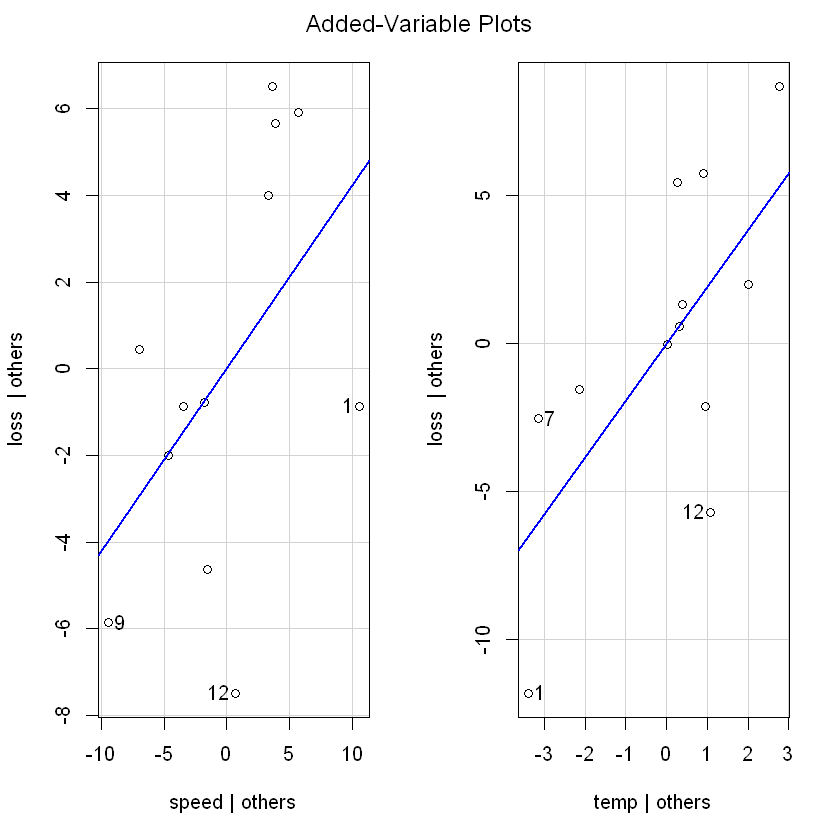

In [21]:
library(car)
avPlots(chemical.lm)

In [22]:
# 분산분석표 그리기
anova(chemical.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
speed,1,897.5503,897.55030,45.017926,8.758075e-05
temp,1,151.2611,151.26112,7.586719,2.231562e-02
Residuals,9,179.4386,19.93762,NA,NA


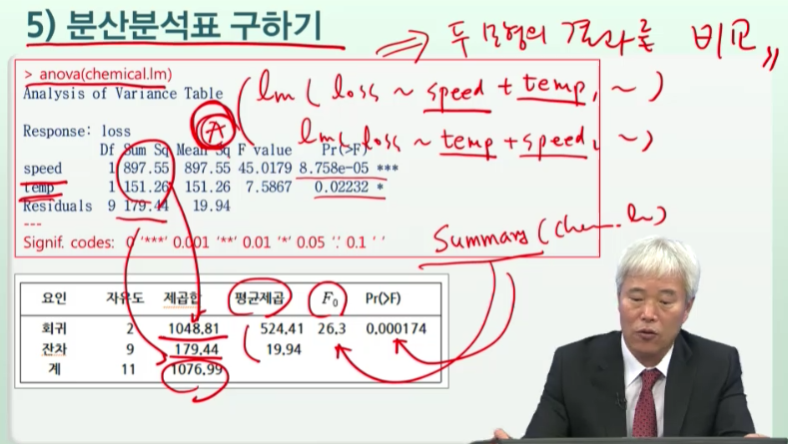

integer(0)

integer(0)

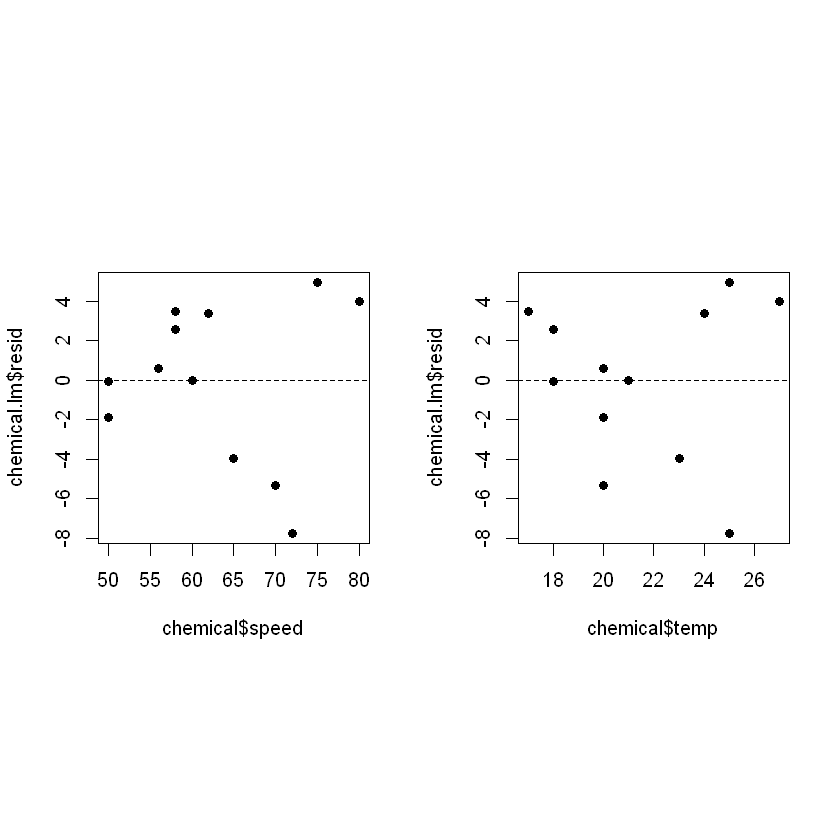

In [26]:
# 잔차 산점도
par(mfrow=c(1,2), pty="s")
plot(chemical$speed, chemical.lm$resid, pch=19)
abline(h=0, lty=2)
identify(chemical$speed, chemical.lm$resid)
plot(chemical$temp, chemical.lm$resid, pch=19)
abline(h=0, lty=2)
identify(chemical$temp, chemical.lm$resid)

integer(0)

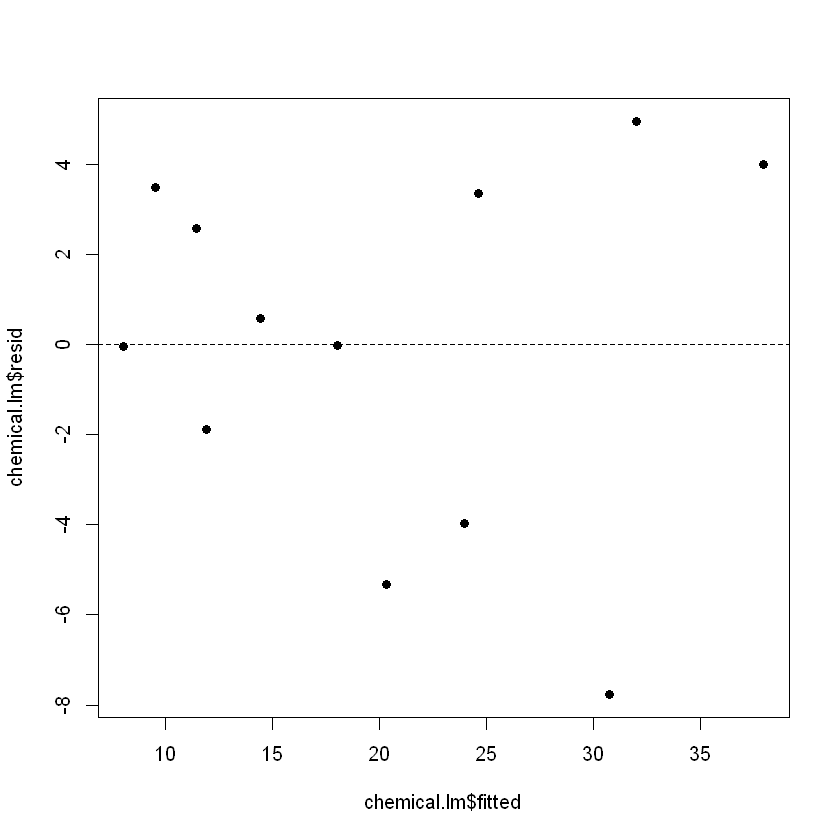

In [27]:
# 잔차 산점도
par(mfrow=c(1,1))
plot(chemical.lm$fitted, chemical.lm$resid, pch=19)
abline(h=0, lty=2)
identify(chemical.lm$fitted, chemical.lm$resid)